In [2]:
!pip install biopython

from Bio import pairwise2
from Bio.pairwise2 import format_alignment

seqA = "ATGCTAGCG"
seqB = "ATGCATGCG"

alignments = pairwise2.align.globalxx(seqA,seqB)

for alignment in alignments:
    print(format_alignment(*alignment))

  Using cached numpy-2.2.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 5.4 MB/s eta 0:00:00a 0:00:01
Using cached numpy-2.2.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.1 MB)
ATGCTA-GCG
|||| | |||
ATGC-ATGCG
  Score=8

ATGC-TAGCG
|||| | |||
ATGCAT-GCG
  Score=8



/home/tuartmith/myenv/lib/python3.12/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
import Bio
print(Bio.__version__)

1.85


In [3]:
from Bio.Align import PairwiseAligner

seqA = "ATGCTAGCG"
seqB = "ATGCATGCG"

aligner = PairwiseAligner()
alignments = aligner.align(seqA, seqB)

# Print top alignment clearly
for alignment in alignments:
    print(alignment)


target            0 ATGCTA-GCG  9
                  0 ||||-|-||| 10
query             0 ATGC-ATGCG  9

target            0 ATGC-TAGCG  9
                  0 ||||-|-||| 10
query             0 ATGCAT-GCG  9



In [2]:
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO

# Save sequences to FASTA
with open("example.fasta", "w") as file:
    file.write(">seq1\nATGCTAGCGTAC\n")
    file.write(">seq2\nATGCGAGCGTAC\n")
    file.write(">seq3\nATGCTAACGTGC\n")

# Perform MSA
cline = ClustalwCommandline("clustalw", infile="example.fasta")
stdout, stderr = cline()

# Load and print alignment
alignment = AlignIO.read("example.aln", "clustal")
print(alignment)


Alignment with 3 rows and 12 columns
ATGCTAGCGTAC seq1
ATGCGAGCGTAC seq2
ATGCTAACGTGC seq3


In [4]:
from Bio.Blast import NCBIWWW, NCBIXML
sequence = "ATGCTAGCGTAC"  # Shorter = faster response

result_handle = NCBIWWW.qblast("blastn", "nt", sequence)

with open("blast_results.xml", "w") as out_handle:
    out_handle.write(result_handle.read())
    result_handle.close()

with open("blast_results.xml") as result_handle:
    blast_record = NCBIXML.read(result_handle)

for alignment in blast_record.alignments[:3]:
    for hsp in alignment.hsps:
        print('****Alignment****')
        print('Sequence:', alignment.title)
        print('Length:', alignment.length)
        print('E-value:', hsp.expect)
        print(hsp.query[0:50] + '...')
        print(hsp.match[0:50] + '...')
        print(hsp.sbjt[0.50] + '...')


In [5]:
from Bio.Blast import NCBIXML

with open("blast_results.xml") as result_handle:
    blast_record = NCBIXML.read(result_handle)

if blast_record.alignments:
    for alignment in blast_record.alignments[:3]:
        for hsp in alignment.hsps:
            print("****Alignment****")
            print("Sequence:", alignment.title)
            print("Length:", alignment.length)
            print("E-value:", hsp.expect)
            print(hsp.query[0:50] + "...")
            print(hsp.match[0:50] + "...")
            print(hsp.sbjct[0:50] + "...")
else:
    print("No significant matches found.")


No significant matches found.


In [6]:
from Bio.Blast import NCBIWWW, NCBIXML

sequence = "AGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAACGGTGAAGGTTAATGTGGG"

# Submit to NCBI BLAST
result_handle = NCBIWWW.qblast("blastn", "nt", sequence)

# Save the results
with open("blast_results.xml", "w") as out_handle:
    out_handle.write(result_handle.read())
    result_handle.close()

# Parse and display results
with open("blast_results.xml") as result_handle:
    blast_record = NCBIXML.read(result_handle)

if blast_record.alignments:
    for alignment in blast_record.alignments[:3]:
        for hsp in alignment.hsps:
            print("****Alignment****")
            print("Sequence:", alignment.title)
            print("Length:", alignment.length)
            print("E-value:", hsp.expect)
            print(hsp.query[0:50] + "...")
            print(hsp.match[0:50] + "...")
            print(hsp.sbjct[0:50] + "...")
else:
    print("No significant matches found.")


****Alignment****
Sequence: gi|358250872|gb|JN834566.1| Uncultured bacterium clone 264E14TEAT 16S ribosomal RNA gene, partial sequence
Length: 870
E-value: 6.21254e-24
AGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGCGTGCCTAATACATG...
||||||||||||||||||||||||||||||||||||||||||||||||||...
AGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGCGTGCCTAATACATG...
****Alignment****
Sequence: gi|194136909|gb|EU842346.1| Uncultured bacterium clone 1103200821189 16S ribosomal RNA gene, partial sequence
Length: 1476
E-value: 6.21254e-24
AGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGCGTGCCTAATACATG...
||||||||||||||||||||||||||||||||||||||||||||||||||...
AGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGCGTGCCTAATACATG...
****Alignment****
Sequence: gi|194139008|gb|EU844445.1| Uncultured bacterium clone 1103200831765 16S ribosomal RNA gene, partial sequence
Length: 1354
E-value: 6.21254e-24
AGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGCGTGCCTAATACATG...
||||||||||||||||||||||||||||||||||||||||||||||||||...
AGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGCGTGCCTAATACATG...


In [9]:
from Bio import SeqIO

with open("example.fastq","w") as file:
    file.write("@read1\n")
    file.write("ATGCTAGCTAG\n")
    file.write("+\n")
    file.write("IIIIIIIIIII\n")
    file.write("@read2\n")
    file.write("CGTACGTACGA\n")
    file.write("+\n")
    file.write("IIIIHGFEDCB\n")

for record in SeqIO.parse("example.fastq","fastq"):
    print("Read ID:", record.id)
    print("Sequence:", record.seq)
    print("Quality scores:", record.letter_annotations["phred_quality"])
    print("-" * 30)

Read ID: read1
Sequence: ATGCTAGCTAG
Quality scores: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
------------------------------
Read ID: read2
Sequence: CGTACGTACGA
Quality scores: [40, 40, 40, 40, 39, 38, 37, 36, 35, 34, 33]
------------------------------


In [1]:
import vcfpy

with open("example.vcf", "w") as file:
    file.write("##fileformat=VCFv4.2\n")
    file.write("#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO\n")
    file.write("chr1\t12345\trs123\tA\tG\t99.0\tPASS\tDP=35\n")
    file.write("chr1\t67890\t.\tT\tC\t87.2\tPASS\tDP=42\n")
    
reader = vcfpy.Reader.from_path("example.vcf")
for record in reader:
    print("Chromosome:", record.CHROM)
    print("Position:", record.POS)
    print("Reference:", record.REF)
    print("Alternate:", record.ALT[0].value)
    print("Quality:", record.QUAL)
    print("INFO:", record.INFO)
    print("-" * 30)

ModuleNotFoundError: No module named 'vcfpy'

In [3]:
import vcfpy

with open("example.vcf", "w") as file:
    file.write("##fileformat=VCFv4.2\n")
    file.write("#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO\n")
    file.write("chr1\t12345\trs123\tA\tG\t99.0\tPASS\tDP=35\n")
    file.write("chr1\t67890\t.\tT\tC\t87.2\tPASS\tDP=42\n")
    
reader = vcfpy.Reader.from_path("example.vcf")
for record in reader:
    print("Chromosome:", record.CHROM)
    print("Position:", record.POS)
    print("Reference:", record.REF)
    print("Alternate:", record.ALT[0].value)
    print("Quality:", record.QUAL)
    print("INFO:", record.INFO)
    print("-" * 30)

Chromosome: chr1
Position: 12345
Reference: A
Alternate: G
Quality: 99.0
INFO: {'DP': 35}
------------------------------
Chromosome: chr1
Position: 67890
Reference: T
Alternate: C
Quality: 87.2
INFO: {'DP': 42}
------------------------------


/home/tuartmith/vcf-env/lib/python3.12/site-packages/vcfpy/header.py:413: FieldInfoNotFound: INFO DP not found using Integer/1 instead
  warnings.warn(


In [4]:
with open("genotypes.vcf", "w") as file:
    file.write("##fileformat=VCFv4.2\n")
    file.write("##INFO=<ID=DP,Number=1,Type=Integer,Description=\"Read Depth\">\n")
    file.write("##FORMAT=<ID=GT,Number=1,Type=String,Description=\"Genotype\">\n")
    file.write("#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO\tFORMAT\tsample1\n")
    file.write("chr1\t12345\trs123\tA\tG\t99.0\tPASS\tDP=35\tGT\t0/1\n")
    file.write("chr1\t67890\t.\tT\tC\t87.2\tPASS\tDP=42\tGT\t1/1\n")


In [5]:
import vcfpy

reader = vcfpy.Reader.from_path("genotypes.vcf")

records = []

for record in reader:
    row = {
        "CHROM": record.CHROM,
        "POS": record.POS,
        "ID": record.ID,
        "REF": record.REF,
        "ALT": record.ALT[0].value,
        "QUAL": record.QUAL,
        "DP": record.INFO.get("DP"),
        "Genotype": record.calls[0].data.get("GT")
    }
    records.append(row)


In [7]:
import pandas as pd

df = pd.DataFrame(records)
df


,CHROM,POS,ID,REF,ALT,QUAL,DP,Genotype
0,chr1,12345,[rs123],A,G,99.0,35,0/1
1,chr1,67890,[],T,C,87.2,42,1/1


In [8]:
import pandas as pd

data = {
    "Microbe": ["Bifidobacterium", "Lactobacillus", "Streptococcus", "E. coli", "Clostridium"],
    "Sample1": [120, 80, 30, 10, 5],
    "Sample2": [100, 70, 50, 20, 10],
    "Sample3": [130, 90, 25, 15, 8]
}

df = pd.DataFrame(data)
df.set_index("Microbe", inplace=True)
df



,Sample1,Sample2,Sample3
Microbe,,,
Bifidobacterium,120,100,130
Lactobacillus,80,70,90
Streptococcus,30,50,25
E. coli,10,20,15
Clostridium,5,10,8


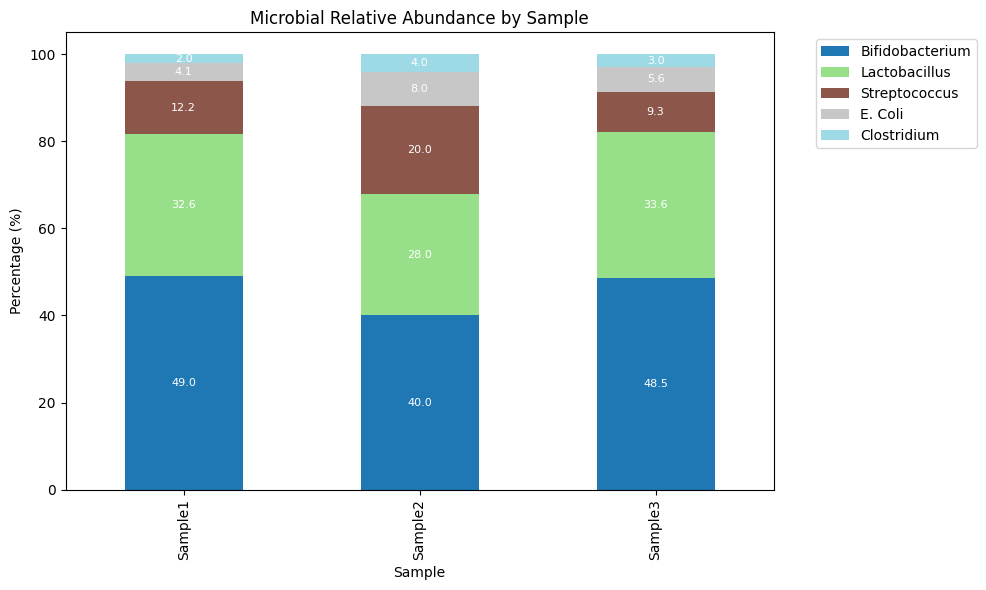

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


data = {"Microbe": ["Bifidobacterium", "Lactobacillus", "Streptococcus", "E. Coli", "Clostridium"], "Sample1": [120,80, 30, 10, 5], "Sample2": [100, 70, 50, 20, 10], "Sample3": [130, 90, 25, 15, 8]}

df = pd.DataFrame(data)
df.set_index("Microbe", inplace=True)
df

relative_abundance = df.div(df.sum(axis=0), axis=1) * 100
relative_abundance = relative_abundance.round(2)
relative_abundance

summary = relative_abundance.describe()
summary

ax = relative_abundance.T.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20")
plt.title("Microbial Relative Abundance by Sample")
plt.ylabel("Percentage (%)")
plt.xlabel("Sample")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add labels to each bar segment
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center', fontsize=8, color='white')

plt.show()


In [17]:
average_abundance = relative_abundance.mean(axis=1).round(2)
average_abundance_sorted = average_abundance.sort_values(ascending=False)
print(average_abundance_sorted.round(2))


Microbe
Bifidobacterium    45.83
Lactobacillus      31.41
Streptococcus      13.86
E. Coli             5.89
Clostridium         3.01
dtype: float64


In [18]:
average_abundance_df = average_abundance.to_frame(name="Avg % Abundance")
average_abundance_df



,Avg % Abundance
Microbe,
Bifidobacterium,45.83
Lactobacillus,31.41
Streptococcus,13.86
E. Coli,5.89
Clostridium,3.01


In [19]:
# Count non-zero microbes per sample
richness = (relative_abundance > 0).sum(axis=0)
richness.name = "Richness"
richness


Sample1    5
Sample2    5
Sample3    5
Name: Richness, dtype: int64

In [20]:
import numpy as np

# Convert percentages to proportions
proportions = df.div(df.sum(axis=0), axis=1)

# Apply Shannon formula across columns (samples)
shannon = - (proportions * np.log(proportions)).sum(axis=0).round(2)
shannon.name = "Shannon Index"
shannon

diversity_df = pd.concat([richness, shannon], axis=1)
diversity_df


,Richness,Shannon Index
Sample1,5,1.18
Sample2,5,1.38
Sample3,5,1.20


In [21]:
import pandas as pd

data = {
    "Microbe": ["Bifidobacterium", "Lactobacillus", "Streptococcus", "E. coli", "Clostridium", "Enterococcus", "Bacteroides"],
    "Sample1": [100, 80, 30, 5, 2, 0, 0],
    "Sample2": [90, 70, 50, 20, 10, 0, 5],
    "Sample3": [130, 90, 25, 15, 8, 5, 5],
    "Sample4": [100, 100, 100, 100, 100, 100, 100],
    "Sample5": [150, 0, 0, 0, 0, 0, 0],
    "Sample6": [30, 30, 30, 30, 30, 30, 30]
}

df = pd.DataFrame(data)
df.set_index("Microbe", inplace=True)
df


,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6
Microbe,,,,,,
Bifidobacterium,100,90,130,100,150,30
Lactobacillus,80,70,90,100,0,30
Streptococcus,30,50,25,100,0,30
E. coli,5,20,15,100,0,30
Clostridium,2,10,8,100,0,30
Enterococcus,0,0,5,100,0,30
Bacteroides,0,5,5,100,0,30


In [22]:
relative_abundance = df.div(df.sum(axis=0), axis=1) * 100
relative_abundance = relative_abundance.round(2)
relative_abundance


,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6
Microbe,,,,,,
Bifidobacterium,46.08,36.73,46.76,14.29,100.0,14.29
Lactobacillus,36.87,28.57,32.37,14.29,0.0,14.29
Streptococcus,13.82,20.41,8.99,14.29,0.0,14.29
E. coli,2.30,8.16,5.40,14.29,0.0,14.29
Clostridium,0.92,4.08,2.88,14.29,0.0,14.29
Enterococcus,0.00,0.00,1.80,14.29,0.0,14.29
Bacteroides,0.00,2.04,1.80,14.29,0.0,14.29


In [23]:
import numpy as np

# Richness: number of non-zero microbes
richness = (relative_abundance > 0).sum(axis=0)
richness.name = "Richness"

# Proportions (not %)
proportions = df.div(df.sum(axis=0), axis=1)

# Shannon Index
shannon = - (proportions * np.log(proportions)).sum(axis=0).round(2)
shannon.name = "Shannon Index"

# Combine metrics
diversity_df = pd.concat([richness, shannon], axis=1)
diversity_df


/home/tuartmith/vcf-env/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Richness,Shannon Index
Sample1,5,1.13
Sample2,6,1.46
Sample3,7,1.34
Sample4,7,1.95
Sample5,1,-0.00
Sample6,7,1.95


/tmp/ipykernel_6333/931296384.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diversity_df["Richness"][i] + 0.1,
/tmp/ipykernel_6333/931296384.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diversity_df["Shannon Index"][i],


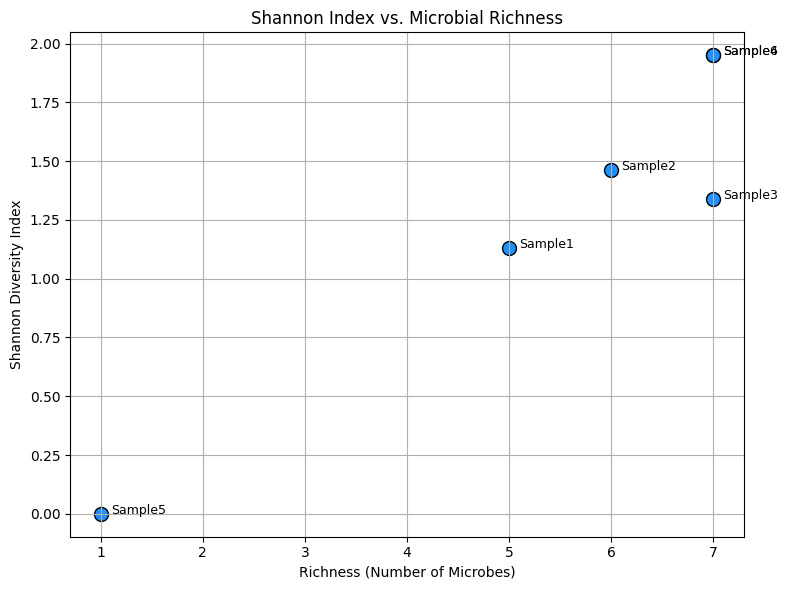

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(
    diversity_df["Richness"],
    diversity_df["Shannon Index"],
    color="dodgerblue",
    edgecolor="black",
    s=100  # marker size
)

plt.title("Shannon Index vs. Microbial Richness")
plt.xlabel("Richness (Number of Microbes)")
plt.ylabel("Shannon Diversity Index")

# Label each point with the sample name
for i, sample_name in enumerate(diversity_df.index):
    plt.text(
        diversity_df["Richness"][i] + 0.1,
        diversity_df["Shannon Index"][i],
        sample_name,
        fontsize=9
    )

plt.grid(True)
plt.tight_layout()
plt.show()
